In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

import os
import time
from hashlib import md5
import scipy

In [5]:
IMAGE_DIR = '../../../Data/Liver_mask/Fibrosis_1_masked/'

os.chdir(IMAGE_DIR)
os.getcwd()

'/home/jaewon/MyWork/Data/Liver_mask/Fibrosis_1_masked'

In [6]:
image_files = os.listdir()
print(len(image_files))

273


In [7]:
image_files[0]

'1285-0012_masked.tif'

In [8]:
cv2.imread(image_files[0]).shape

(600, 800, 3)

### Helper Functions

In [9]:
def filter_images(images):
    image_list = []
    for image in images:
        try:
            assert cv2.imread(image).shape[2] == 3
            image_list.append(image)
        except  AssertionError as e:
            print(e)
    return image_list

# change it to gray scale image
def img_gray(image):
    image = cv2.imread(image)
    return np.average(image, weights=[0.299, 0.587, 0.114], axis=2)

#resize image and flatten
def resize(image, height=30, width=30):
    row_res = cv2.resize(image,(height, width), interpolation = cv2.INTER_AREA).flatten()
    col_res = cv2.resize(image,(height, width), interpolation = cv2.INTER_AREA).flatten('F')
    return row_res, col_res

#gradient direction based on intensity 
def intensity_diff(row_res, col_res):
    difference_row = np.diff(row_res)
    difference_col = np.diff(col_res)
    difference_row = difference_row > 0
    difference_col = difference_col > 0
    return np.vstack((difference_row, difference_col)).flatten()
    #return difference_row
    #return np.vstack((difference_row, difference_col)) #str method
    
def file_hash(array):
    return md5(array).hexdigest()

def difference_score(image, height = 30, width = 30):
    gray = img_gray(image)
    row_res, col_res = resize(gray, height, width)
    difference = intensity_diff(row_res, col_res)
    
    return difference

def difference_score_dict_hash(image_list):
    ds_dict = {}
    duplicates = []
    hash_ds = []
    for image in image_list:
        ds = difference_score(image)
        hash_ds.append(ds)
        filehash = md5(ds).hexdigest()
        if filehash not in ds_dict:
            ds_dict[filehash] = image
        else:
            duplicates.append((image, ds_dict[filehash]) )
    
    return  duplicates, ds_dict, hash_ds

In [10]:
image_files = filter_images(image_files)
duplicates, ds_dict, hash_ds =difference_score_dict_hash(image_files)

In [11]:
len(duplicates)

0

In [12]:
for file_names in duplicates[:10]:
    try:
    
        plt.subplot(121), plt.imshow(cv2.imread(file_names[0]))
        plt.title('Duplicate'), plt.xticks([]), plt.yticks([])

        plt.subplot(122), plt.imshow(cv2.imread(file_names[1]))
        plt.title('Original'), plt.xticks([]), plt.yticks([])
        plt.show()
    
    except OSError as e:
        continue

In [13]:
import scipy.spatial

def hamming_distance(image, image2):
    score =scipy.spatial.distance.hamming(image, image2)
    return score


#Hamming
def difference_score_dict(image_list):
    ds_dict = {}
    duplicates = []
    for image in image_list:
        ds = difference_score(image)
        
        if image not in ds_dict:
            ds_dict[image] = ds
        else:
            duplicates.append((image, ds_dict[image]) )
    
    return  duplicates, ds_dict

In [14]:
image_files = filter_images(image_files)
duplicates, ds_dict =difference_score_dict(image_files)

In [15]:
len(duplicates)

0

In [16]:
len(ds_dict.keys())

273

In [17]:
import itertools
for k1,k2 in itertools.combinations(ds_dict, 2):
    if hamming_distance(ds_dict[k1], ds_dict[k2])< .10:
        duplicates.append((k1,k2))

In [18]:
len(duplicates)

250

In [19]:
duplicates

[('1285-0012_masked.tif', '0903-0008_masked.tif'),
 ('1285-0012_masked.tif', '0153-0006_masked.tif'),
 ('1285-0012_masked.tif', '0597-0005_masked.tif'),
 ('1285-0012_masked.tif', '0597-0013_masked.tif'),
 ('1285-0012_masked.tif', '0956-0003_masked.tif'),
 ('1285-0012_masked.tif', '0903-0014_masked.tif'),
 ('1285-0012_masked.tif', '1285-0011_masked.tif'),
 ('1285-0012_masked.tif', '0597-0015_masked.tif'),
 ('1285-0012_masked.tif', '0126-0002_masked.tif'),
 ('1285-0012_masked.tif', '0903-0007_masked.tif'),
 ('1285-0012_masked.tif', '0903-0009_masked.tif'),
 ('1285-0012_masked.tif', '0153-0005_masked.tif'),
 ('0435-0003_masked.tif', '0384-0012_masked.tif'),
 ('0435-0003_masked.tif', '0903-0015_masked.tif'),
 ('0435-0003_masked.tif', '0435-0005_masked.tif'),
 ('0435-0003_masked.tif', '2240-0008_masked.tif'),
 ('0435-0003_masked.tif', '0384-0014_masked.tif'),
 ('0435-0003_masked.tif', '0597-0016_masked.tif'),
 ('0435-0003_masked.tif', '0435-0006_masked.tif'),
 ('0435-0003_masked.tif', '0597

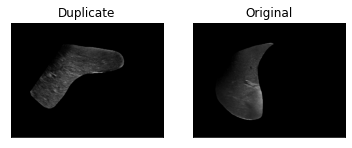

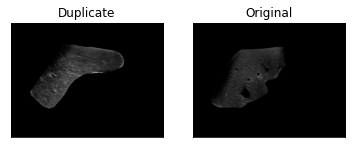

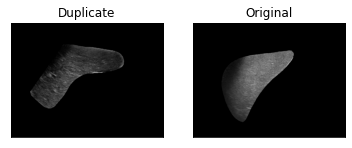

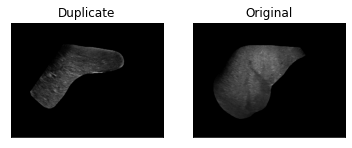

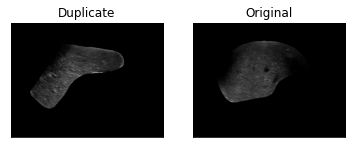

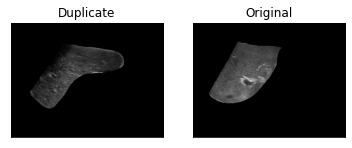

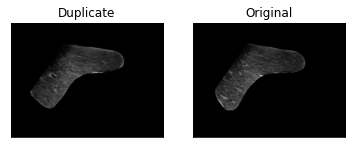

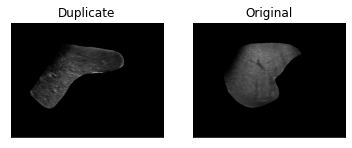

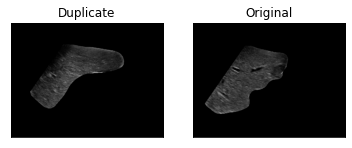

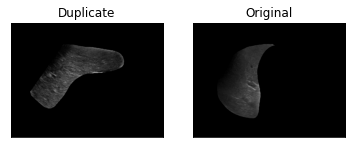

In [20]:
for file_names in duplicates[:10]:
    try:
    
        plt.subplot(121), plt.imshow(cv2.imread(file_names[0]))
        plt.title('Duplicate'), plt.xticks([]), plt.yticks([])

        plt.subplot(122), plt.imshow(cv2.imread(file_names[1]))
        plt.title('Original'), plt.xticks([]), plt.yticks([])
        plt.show()
    
    except OSError as e:
        continue

In [21]:
Medical Image Reliability Verification Using Hash Signatures and Sequential Square Encoding

SyntaxError: invalid syntax (<ipython-input-21-cea9508cae4a>, line 1)